In [23]:
rm(list=ls())
#install.packages("matrixStats")
library("matrixStats")
require(parallel)
#install.packages("MASS")
library(MASS)
#install.packages("glmnet")
library("glmnet")
#install.packages("pbapply")
library(pbapply)
#install.packages("stats")
library('stats')
#install.packages("tseries")
library("tseries")
#install.packages("xtable")
library("xtable")
#install.packages("ggplot2")
library("ggplot2")
#install.packages("dplyr")
library("dplyr")
#install.packages("tidyr")
library("tidyr")

# Performance of shrinkage methods in macroeconomic forecasting

The project by [Liudmila Kiseleva](https://github.com/milakis) for the course [Computational Statistics](https://github.com/ljanys/CompStat/).

Based on the paper Smeekes, S., and Wijler, E. (2018). [Macroeconomic forecasting using penalized regression methods](https://www.sciencedirect.com/science/article/pii/S0169207018300074). International Journal of Forecasting, 34(3), 408-430.

## Abstract

Forecasting macroeconomic outcomes by the nonstructural methods appears to be not an easy task: macroeconomic data tends to be high-dimensional. Traditionally, shrinkage methods are considered to be a solution for performing forecasts in a high-dimensional setting with many potential predictors. I focus on ridge and lasso regressions. First, I describe their theoretical properties and explain their differences. Second, I simulate realistic macroeconomic time series to evaluate ridge and lasso performance in the sparse/abundant models; in the models with different number of predictors; in the models with cross-sectional and serial correlation. Finally, I apply ridge and lasso regressions to the [FRED Monthly Database for Macroeconomic Research](https://research.stlouisfed.org/econ/mccracken/fred-databases/) to compare their performance for few selected macroeconomic variables. I obtain predictable result: ridge and lasso tend to outperform each other when the Data Generation Process for the series differs. Therefore, I conclude that an optimal strategy for macroeconomists would be not to choose one shrinkage method to perform the forecast; but to combine few methods and compare the results.

## Table of Contents

* [1. Introduction](#introduction)
* [2. Shrinkage methods description](#chapter2)
    * [2.1 Motivation for shrinkage methods in macroeconomic forecasting](#section_2_1) 
    * [2.2 Theoretical properties of the OLS estimator](#section_2_2)
    * [2.2 Theoretical properties of the ridge estimator](#section_2_3)
    * [2.2 Theoretical properties of the lasso estimator](#section_2_4)
* [3. Simulation study](#chapter3)
    * [3.1 Data simulation and estimation algorithms](#section_3_1) 
    * [3.2 Demonstration of one trial](#section_3_2)
    * [3.3 Sparsity and number of predictors effects](#section_3_3)
    * [3.4 Cross-sectional and serial correlation effects](#section_3_4)
* [4. Empirical application](#chapter4)
    * [4.1 Data preparation](#section_4_1)
    * [4.2 Application](#section_4_2)
* [5. Conclusion](#chapter5)
* [6. References](#chapter6)

## 1. Introduction <a class="anchor" id="introduction"></a>

Forecasting macroeconomic variables by the nonstructural methods appears to be not an easy task: macroeconomic data tends to be high-dimensional. That happens because data availability is naturally limited by time; however, the number of potential predictors might be notoriously high. High dimensionality leads to a lot of variability in the fit or even to the infinite variance; high variance applies that small changes in the data can result in large changes in the estimate. Therefore, the forecast might not yield accurate estimates of the response on new observations that were not part of the original data set. Traditionally, regularization methods are considered to be a solution for performing forecasts in the high-dimensional setting with many potential predictors. I choose one of the group of regularization methods - shrinkage methods - to demonstrate their ability to solve curse of dimensionality issue and to compare their performance in different settings.

In my project I focus on two shrinkage methods: ridge and lasso regressions. Their main idea is to regularize the coefficients with specific penalty functions to control the variance. Penalty functions force the variance of the coefficient estimates to decrease towards zero at the cost of larger bias of the estimates. The difference between ridge and lasso lies in the specification of the penalty functions: the former uses $l_2$-norm and the later - $l_1$-norm. With the help of the $l_2$-norm ridge regression shrinks the coefficients towards zero but never sets them exactly to zero. On the other hand, with the $l_1$-norm lasso sets some coefficients exactly equal to zero; hence, lasso also performs the model selection for us. 

This difference in approaches justifies the fact that ridge and lasso outperform each other in the settings with various Data Generation Processes (DGP). First, we would expect that lasso will show better performance when many of the true coefficients in the model are, in fact, equal to zero. I call it sparse model. On the opposite, ridge is expected to perform better in the abundant model when many predictors, indeed, have some effect on the response variable. I demonstrate this in my simulation study based on Smeekes and Wijler (2018). I generate the data with the purpose to resemble the realistic macroeconomic times series. Then I vary the number of predictors of which true coefficients are equal to zero. The performance of each method is evaluated by the test mean square error (MSE). I obtain the predictable result that ridge outperforms lasso in the abundant model and lasso outperforms ridge in the sparse model. I do this for the different number of potential predictors to show the curse of dimensionality in practice: the variance is appeared to be proportional to the number of variables included in the model. Another interesting fact is that the variance tends to be larger in the abundant model. It can be explained by the potential multicolinearity between variables. Since a large part of variables has an effect on reponse, it is challenging to identify the effect between relevant and irrelevant  variables. To evaluate this statement I manually introduce multicolinearity to the data. I observe similar picture: the MSE substantially increases in the abundant mode;l and ridge/lasso is a favorable method in the abundant/sparse model. Finally, I add serially correlated errors to the model to mimic the time series data structure. Serial correlation in the error terms might signal that the lagged version of the dependant variable is missed in the specification. I do not find any significant effect on the difference in performance between ridge and lasso; however, the variance for all specifications tends to be underestimated. 

To illustrate how ridge and lasso will perform in empirical setting I use [FRED Monthly Database for Macroeconomic Research](https://research.stlouisfed.org/econ/mccracken/fred-databases/). The database presents 135 variables on a monthly basis beginning from 1959. I select four response variables: Total Industrial Production, Civilian Employment, Real Personal Consumption Expenditures, and Effective Federal Funds Rate. Consequently, the other variables in the database as well as the lags of a response variables would be potential predictors. In the estimation I follow the rolling window approach as in Smeekes and Wijler (2018). It means that an initial in-sample period covering 10 years of monthly observations is used to estimate the models by which to obtain the first out-of-sample prediction. For each new prediction, we keep the length of the in-sample period fixed and move the estimation sample forward by one period. The number of optimal lags is determined by BIC. I apply the forecasting horizon of six months. As the result, I find that ridge produces lower MSE for two response variables and lasso - for the other two reponse variables. That means that the DGP of the series in the macroeconomic dataset might differ; therefore, there is no universal shrinkage method which we can apply to macroeconomic data and which will outperform the others in any ocassion.

In section 2 I explain why I choose to apply shrinkage methods in macroeconomic forecasting. I also present the theoretical properties of the ridge and lasso regressions in comparison to the OLS. In section 3 I describe how I generate data and implement the simulation study. In section 4 I perform the empirical application of ridge and lasso with macroeconomic dataset. I conclude in section 5.

## 2. Shrinkage methods description  <a class="anchor" id="chapter2"></a>

In this section I explain why I choose to apply shrinkage methods in a high-dimensional times series data setting and provide a short literature review on the topic. Then I describe theoretical properties of the methods. For this I begin with the classical properties of the OLS estimator. Then I report how these properties can be expanded with the penalty functions used in ridge and lasso estimation. Detailed representation of the properties allows me to demonstrate how shrinkage methods ressolve the issues induced by the DGP and illustrate under what conditions one method can outperform the other. 

**2.1 Motivation for shrinkage methods in macroeconomic forecasting**  <a class="anchor" id="section_2_1"></a>

The macroeconomic forecasting literature can be divided into two large parts: structural and nonstructural forecasting methods.Structural methods interpret economic data through the lens of economic theory. In particular, economic theory guides a researcher in developing mathematical statements about how a variable of interest is related to a set of "explanatory" variables. These economic assumptions define an empirical model that is capable of predicting possible observable outcomes. Nonstructural methods, on the other hand, rely on economic theory little. They attempt to exploit the reduced-form correlations in observed macroeconomic time series and forecast output variables on the grounds of statistical knowledge. In my project I focus my attention on the nonstructural methods of forecasting; in particular, on the ability of statistical learning techniques to predict macroeconomic outcomes.

Statistical learning theory includes regression, classification, regularization, tree based and the other groups of forecasting methods. The choice of a specific method depends on few factors: on the data structure; on the goal a researcher pursues, for example, interpretability of a forecast; and on the assumption of the underlying DGP of the dataset of interest. Refering to the data structure, forecasting macroeconomic variables appears to be not an easy task: the datasets tend to be presented in a high-dimensional times series setting. The reason for high dimensionality lies in the natural limit of the data availability back in time; for instance, some of the most frequently used modern macroeconomic monthly databases start in 1959 (Stock and Watson (2014), McCracken and Ng (2015)). At the same time, the number of potential predictors of business cycle fluctuations might be notoriously high. Therefore, the number of predictors can be close/equal to or more than the number of observations. The former leads to a lot of variability in the fit; the later - to a non-unique least squares estimates and the infinite variance. The high variance might be not in favor while forecasting because small changes in the data can result in large changes in the estimate.  Hence, the forecast obtained will not yield accurate estimates of the response on new observations that were not part of the original data set. The second factor in choosing a method is how easily the forecasted result is interpretable. Even though the number of potential predictors can be large, only some of the variables might be associated with the response. Including irrelevant variables results in unnecesary complexity of the model and, hence, in difficulty with its interpretation. 

Traditionally, regularization methods are considered to be a solution for performing forecasts in the high-dimensional setting with many potential predictors. This group of techniques improves simple linear regression model by replacing least square fitting with the alternative fitting procedures. Specifically, subset selection approach involves identifying the subset of input variables that are related to a response and runnig a regression on a reduced set of variables. Penalized methods, such as ridge and lasso regressions, shrink the estimated coefficients towards zero what has an effect of variance reduction and, depending on the method, variable selection. Dimension reduction approach computes $M$ linear combinations, or projections, of $p$ predictors, where $M < p$, and uses these projections in the least squares regression. Hence, regularization methods propose more restrictive procedure for macroeconomic forecasting with the higher level of prediction accuracy and lower variance compared to the simple least squares regression or tree based methods.  

Subset selection methods, in particular, backward and forward stepwise regressions, do not appear to be popular among macroeconomists to produce forecasts for few reasons. First, stepwise algorithms appear to be ‘greedy’: it is not guaranteed that best possible model containing a subset of the predictors would be found. Second, they perform what is known as ‘hard thresholding’: regressor set selected from the available predictors may disagree with the one chosen when the number of available predictors is increased or decreased slightly. In other words, hard thresholding is sensitive to the small changes in the data. For these reasons I don't concentrate on subset selection methods in my project. Dimension reduction methods principal component analysis (PCA) and factor analysis, on the other hand, became the workhorse methods for macroeconomic forecasting. Factor models were demonstrated to perform prominently by Stock and Watson (1999) and Stock and Watson (2002). PCA has been the preferable way of factor model estimations; rigorous illustrations can be found in Bai and Ng (2002), Bai (2003), and Bai and Ng (2006). Consequently, dimension reduction methods is the huge topic for the research; I will leave it for now because of the limited capacity of my project.

In my work I focus on the shrinkage methods; specifically, on the ridge and lasso regressions. Ridge regression was introduced by Hoerl and Kennard (1970). The main idea of ridge is to penalize the regression coefficients to reduce the variance at the cost of estimator bias using $l_2$-norm as a penalty function. The Least Absolute Shrinkage and Selection Operator (lasso) was proposed by Tibshirani (1996). It uses $l_1$-norm penalty function which allows to shrink some of the regression coefficients exactly to zero and, therefore, it additionally performs variable selection. Since the time of the first publications ridge and lasso became a popular tool for estimation in medicine and biological studies (Jain (1985), Ogutu et al. (2012), Vlaming and Groenen (2015), Goebl et al. (2015), Zhang et al. (2017)); agriculture (Conniffe et al. (1976), Pimentel et al. (2007), Jamal (2007), Singh (2019), Johnston (2019)); sociology (Bucca and Urbina (2017), Beard (2019), Molina and Garip (2019)); and in the other disciplines including various fields in economics (Huang and Mintz (1990), Schneider and Wagner (2008), Jean et al. (2016), Mullainathan and Spiess (2017),  McKenzie and  Sansone (2019)).

In recent macroeconomic forecasting literature shrinkage methods got a lot of attention in various time series high-dimensional settings.  The authors attempt to assess the properties of ridge and lasso in autoregressive (AR) and vector autoregressive (VAR) models; in stationary and non-stationary processes with Gaussian and non-Gaussian errors. For instance, De Mol et al. (2008) compare PCA with penalized regressions in a forecasting model without lags and with Gaussian errors. Wang et al. (2007) and Hsu et al. (2008) assess subset selection via the lasso in AR and VAR models. Kim and Swanson (2014) apply data reduction methods in an empirical setting. Kock and Callot (2015) establish non-asymptotic oracle inequalities for the prediction error in stationary VAR. Basu and Michailidis (2015) apply regularized estimation in stochastic regression with serially correlated errors and in VAR models. Medeiros and Mendes (2016) study the asymptotic properties of the lasso when the errors are non-Gaussian and conditionally heteroskedastic. The paper of my interest by Smeekes and Wijler (2018) evaluates the performance of shrinkage methods under different settings: in stationary processes with serially corrrelated and not correlated errors; with increasing number of predictors; with non-stationary and cointegrated variables; in an empirical setting with AR terms. I choose some of these specifications which I consider to be relevant and apply them in my simulation and empirical studies.

**2.2 Theoretical properties of the OLS estimator** <a class="anchor" id="section_2_2"></a>

Shrinkage methods help to solve the problem of high variance in high-dimensional data. However, the performance of each method depends on the assumed DGP of a dataset of interest. To show how ridge and lasso lower the variance and in what setting each of the method might be favorable, I start with the theoretical properties of the OLS estimator. I expand them for ridge and lasso in the next sub-sections.

Consider the linear regression model in the form:

$$Y = X \beta +\epsilon,$$

where:
- $Y = (y_1,...,y_n)^T$ is a vector of $n$ responses
- $X = (x'_1,...,x'_n)^T$ is a $n \times p$ matrix of predictors of rank $p (\leq n)$
- $\beta = (\beta_1,...,\beta_p)^T$ is a $p$ vector of coefficients
- $\epsilon$ is a $n$ vector of independently and identically distributed (i.i.d.) error terms, $E(\epsilon)=0$ and $E(\epsilon \epsilon^T) = \sigma^2 I_n$

The least square estimator of $\beta$ can be obtained by minimizing the residual sum of squares (RSS):

$$\mathop{min}_{\textbf{$\beta$}}((Y - X \beta)^T (Y - X \beta))$$

Solving it with respect to $\beta$ gives:

$$\hat{\beta}^{ols} = (X^T X)^{-1} X^T Y$$ (1)

Additionally, OLS estimator is unbiased: 

$$E(\hat{\beta}^{ols}) = E((X^T X)^{-1} X^T Y) = E(\beta + (X^T X)^{-1} X^T \epsilon) = \beta$$, 

and its variance–covariance matrix is equal to:

$$Var(\hat{\beta}^{ols}) = E((\hat{\beta}^{ols} - \beta)(\hat{\beta}^{ols} - \beta)^T) = E((X^T X)^{-1} X^T \epsilon \epsilon^T X (X^T X)^{-1}) = \sigma^2 (X^T X)^{-1}$$ (2).

From (1) we can see that OLS estimator is only definied if $(X^T X)^{-1}$ exist, therefore, matrix $X^T X$ should be full-rank. Otherwise, the matrix is invertible and its determinant is equal to zero. This is the case when the columns of $X$ can be written as a linear combination of the other columns and, hence, the covariates are perfectly multicolinear. If we try to compute the variance from (2), we face a division-by-zero problem: we divide $\sigma^2$ by zero and, as a consequence, the variances of the regression coefficients (the diagonal elements of $Var(\hat{\beta}^{ols})$) go to infinity. This case mostly occurs in a high-dimensional data in which the number of covariates $p$ exceeds the number of observations $n$. 

If one of the regressors is highly correlated with the other regressors, then the regression suffers from multicollinearity, although the multicollinearity is not perfect. In such a case the matrix is full-rank, but it is not very far from being rank-deficient. Continuing with the division-by-zero analogy above, when multicollinearity is not perfect, we are dividing $\sigma^2$ in equation (2) by a number that is very small, so that the variances of the regression coefficients are very large.

**2.3 Theoretical properties of the ridge estimator** <a class="anchor" id="section_2_3"></a>

We have seen that, if the data is high-dimensional and multicolinear, then the matrix $(X^T X)^{-1}$ from the equation (1) can be a very small number or zero. Therefore, the coefficients $\hat{\beta}^{ols}$ can explode (become large). Here lies the main idea behind ridge regression: to control variance, we might constraint or regularize the coefficients. Hence, the minimization of the penalized residual sum of squares (PRSS) is equivalent to solving the following convex optimization problem:

$$\mathop{min}_{\textbf{$\beta$}}(Y - X \beta)^T (Y - X \beta)$$

subject to the $$\sum_{j=1}^{p} \beta_j^2 \leq t$$ (3)

for some positive value $t$. $||\beta||_2 = \sum_{j=1}^{p} \beta_j^2$ is also called $l_2$-norm. 

Two important assumptions:
- $X$ is assumed to be standardized (zero mean, unit variance)
- $Y$ is assumed to be centered

We solve the penalized residual sum of squares:

$$PRSS(\beta)_{l_2} = (Y - X \beta)^T (Y - X \beta) + \lambda \sum_{j=1}^{p} \beta_j^2 $$

$\lambda \geq 0$ is called tuning parameter and $\lambda \sum_{j=1}^{p} \beta_j^2$ is shrinkage penalty term. Notice that the intercept $\beta_0$ is not included to the penalty term: we want to shrink the estimated coefficients of the predictors but not the intercept, which is simply a measure of the mean value of the response.

That gives the following ridge estimator:

$$\hat{\beta}^{ridge} = (X^T X + \lambda I_p)^{-1} X^T Y$$ 
(3.1)

Since we are adding a positive constant to the diagonal of $X^T X$, we are, in general, producing an invertible
matrix, $X^T X + \lambda I_p$, even if $X^T X$ is singular. 

The ridge regression estimator is related to the classical OLS estimator in the following manner:

$$\hat{\beta}^{ridge} = (X^T X + \lambda I_p)^{-1} X^T Y = (I_p + \lambda (X^T X)^{-1})(X^T X)^{-1} X^T Y = (I_p + \lambda (X^T X)^{-1}) \hat{\beta}^{ols} $$ 

Ridge estimator is biased estimator of the true parameter $\beta$ if $\lambda \neq 0$:

$$E(\hat{\beta}^{ridge}) = E((I_p + \lambda (X^T X)^{-1}) \hat{\beta}^{ols}) = (I_p + \lambda (X^T X)^{-1}) \beta \neq \beta$$ (4)

We can see from the equation (4) that  the bias of the ridge estimator is proportional to $\lambda$. That is, the larger is $\lambda$, the larger is the bias of the ridge estimator with respect to $\beta$.

The variance of the ridge estimator is:

$$Var(\hat{\beta}^{ridge}) = E(\hat{\beta}^{ridge} - \beta)(\hat{\beta}^{ridge} - \beta)^T) = E((X^T X + \lambda I_p)^{-1} X^T \epsilon \epsilon^T X (X^T X + \lambda I_p)^{-1}) = \sigma^2 W (X^T X)^{-1} W^T,$$ (5).

where $W = (X^T X + \lambda I_p)^{-1} X^T X$. 

The variance of the ridge regression estimator vanishes as $\lambda$ tends to infinity:

$$\lim_{\lambda\to\infty} Var(\hat{\beta}^{ridge}) = \lim_{\lambda\to\infty} \sigma^2 W (X^T X)^{-1} W^T = 0_{pp}$$

*Hence, the variance of the ridge coefficient estimates decreases towards zero and the bias becomes larger as the penalty parameter becomes large.*

The next question is whether such $\lambda$ exist so that the ridge regression estimator may outperform the OLS estimator. Theorem 2 by Theobald (1974) provides the proof using the concept of the MSE. The MSE of any estimator of a parameter $\theta$ can be presented as the sum of the variance of the estimator and the squared bias of the estimator: $MSE(\hat{\theta}) = Var(\hat{\theta}) + [Bias(\hat{\theta})]^2$. The equation implies that in the case of unbiased estimators, the MSE and variance are equivalent. 

Theorem 2 says that, if the condition 

$$\lambda < 2 \sigma^2 ((\beta^{ridge})^T \beta^{ridge})^{-1}$$
(5)

is satisfied, then 

$$MSE(\hat{\beta}^{ridge}(\lambda)) < MSE(\hat{\beta}^{ridge}(0)) = MSE(\hat{\beta}^{ridge})$$. 

Theorem illustrates that the ridge regression estimator strikes a balance between the bias and variance: for small $\lambda$ the variance of the ridge estimator dominates the MSE and the ridge estimator is close to the unbiased OLS estimator. For large $\lambda$ the variance vanishes and the bias dominates the MSE. Also, according to the equation (5), the optimal value of $\lambda$ depends on the quantities $\beta$ and $\sigma^2$; they are unknown in practice. Then, the penalty parameter is chosen in a data-driven fashion by means of cross-validation or information criterion. 

**2.3 Theoretical properties of the lasso estimator** <a class="anchor" id="section_2_4"></a>

Ridge regression helps to reduce the variance of the estimator. However, it will not set any of the ridge coefficients exactly to zero: from the equation (3.1) matrix $X^T X$ is positive semi-definite  and no increase in non-negative $\lambda$ will drive the estimator to zero. Hence, ridge regression will include all the predictors to the final model. It is a disadvantage of ridge regression because while we are working with complex models we may want to produce sparse solution for better interpretability of the final result. The lasso provides this kind of solution: for large enough tuning parameter $\lambda$ it sets some coefficients exactly equal to zero. So then the lasso also performs the model selection for us. 

Lasso convex optimization problem looks similar to the ridge problem: 

$$\mathop{min}_{\textbf{$\beta$}}(Y - X \beta)^T (Y - X \beta)$$

subject to the $$\sum_{j=1}^{p} |\beta_j| \leq t$$ 

Therefore, the PRSS is:

$$PRSS(\beta)_{l_1} = (Y - X \beta)^T (Y - X \beta) + \lambda \sum_{j=1}^{p} |\beta_j| $$

You can see that the lasso penalty term differs from the ridge penalty term. $||\beta||_1 = \sum_{j=1}^{p} |\beta_j|$ is called $l_1$-norm. 

Contrary to ridge regression, the lasso does not admit a closed-form solution. The $l_1$-penalty makes the
solution non-linear because the absolute value is not differentiable. The above constrained minimization is a quadratic programming problem, whose solution can be efficiently approximated. Tibshirani (1996) does that in the original paper and depicts geometrically why ridge and lasso shrink the coefficients to zero differently for the two parameters :

![Alt](images/Tibshirani.png)

On the first picture we see lasso regression and on the second - ridge regression. The residual sum of squares has elliptical contours, centered at the full least squares estimate. The constraint region for ridge regression is the disk and for lasso is the diamond. The solution is the first place that the contours touch the disk or the diamond. For the ridge regression there are no corners for the contours to hit and, hence, no zero solutions. Unlike the disk, the diamond has corners; if the solution occurs at a corner, then it has one parameter $\beta_j$ equal to zero. If there are more than two parameters, the diamond becomes a rhomboid, and has many corners, flat edges and faces; there are many more opportunities for the estimated parameters to be zero.

There exists large literature on the theoretical properties of lasso and the analytical solution in different contexts such as Buhlmann and van de Geer (2011), Tibshirani and Taylor (2011), Tibshirani (2012), Wieringen (2020a).

## 3. Simulation study <a class="anchor" id="chapter3"></a>

**3.1 Data simulation and estimation algorithms** <a class="anchor" id="section_3_1"></a>

I simulate different specifications of the datasets based on the framework by Smeekes and Wijler (2018) assuming that these DGPs might be the ones to produce the FRED database. Simulation of a typical macroeconomic dataset will differ from the cross-sectional simulation because the observations here will have time index. That results in possible correlation between observations which is common for the time series data. Moreover, some of the procedures to work with data applied in a cross-sectional setting should be corrected in a times series setting. For example, traditional $k$-fold cross-validation (CV) is replaced by the time series CV to keep the time structure of the data intact which I describe further in the section. I focus on stationary times series, and in the empirical application I correct the time series for stationarity. Smeekes and Wijler (2018) in their original paper also simulate the non-stationary and cointegrated variables. 

I generate stationary processes where the dependent variable depends on observable explanatory variables and a possibly autoregressive error term:

$$y_{t+1} = x'_t \beta_x + \epsilon_{t+1}$$
$$(1 - \alpha L) \epsilon_{t+1} = v_{t+1},$$

where $x_t \sim \mathcal{N}(0,\sum_N)$, 
$ \sum_N = 
\begin{bmatrix} 
1 & ... & p^{|j-i|} \\
... & ... & ...\\
p^{|i-j|} & ... & 1 \\
\end{bmatrix}
\quad
$ and $v_{t+1} \sim \mathcal{N}(0,1)$

Further assumptions about the variables and their distribution depend on the specification of the dataset:
- Criteria 1: sparsity. From the section 2 we know that ridge and lasso regressions are applied to mitigate high variance which appears because of possible multicolinearity in the data. However, the efficiency of the methods might differ for the different degrees of sparsity in the model. Since the lasso shrinks some of the coefficients exactly to zero and ridge shrinks the coeficients toward zero but never sets them exactly to zero, we would expect that the lasso will perform better when some of the true coefficients are zero and ridge, on the opposite, when the true coefficients are not zero. Therefore, I simulate two specifications of the dataset with the different degrees of sparsity in the coefficients. In the first one five coefficients are non-zero and then $\beta_x = (i'_5,0'_{N-5})'$ where $i_5$ is a $(5 \times 1)$ vector of ones, $0_{N-5}$ is a $((N-5) \times 1)$ vector of zeros, and $N$ is the number of potential predictors included to the model. In the second specification $\beta = (i'_{N*3/5},0'_{N*2/5})'$ where $i'_{N*3/5}$ is a $(N*3/5 \times 1)$ vector of ones and $0_{N*2/5}$ is a $(N*2/5 \times 1)$ vector of zeros.
- Criteria 2: number of predictors. When the number of variables in the candidate set  is large relative to the number of available observations, modelling the dependent variable is likely to result in a large forecasting variance. For example, assuming the explanatory variables follow a Gaussian distribution, Stock and Watson (2006) show that the OLS forecast is normally distributed with a variance proportional to the number of variables included in the model divided by the total number of available observations. Therefore, I apply ols, ridge and lasso regressions to the number of predictors $N =10,50,100$. 
- Criteria 3: cross-sectional correlation. The presence of multicollinearity in the data, especially between relevant and irrelevant variables, leads to inconsistencies in the selection of the correct variables. We see this effect when we change the sparsity of the model. Additionally, I manually add multicolinearity to the regressors in both sparse and abundant model. For this I change the degree of cross-sectional correlation varying $p$ in the matrix $\sum_N$. 
- Criteria 4: serial correlation. It is induced to the simulation to mimic the time series data structure. Serial correlation in the error terms might signal that the lagged version of the dependant variable is missed in the specification. I add serial correlation to the model by varying $\alpha$. 

For each specification I generate $100$ observations to the $T = 99$ of which I apply the lasso and ridge regressions. To choose the tuning parameter I generate $(100 \times 1)$ grid of $\lambda$-values and select the optimal value by the time series CV as in Hyndman and Athanasopoulos (2018). Time series CV is performed by reserving the first part of the sample to estimate the model under various settings of the tuning parameters after which the resulting models’ fit are compared in a pseudo out-of-sample evaluation. As in the original paper by Smeekes and Wijler (2018) I adopt the threshold $c_T = (\frac{2}{3} \times T)$ and let $X_{cT} = (x_1,...,x_{cT})$. For each value of the tuning parameter, say, $\lambda_j$ for $j \in J = \{1,...,100\}$, the model is estimated on $X_{cT}$ to obtain the coefficient vector $\hat{\beta}(\lambda_j)$. Then a pseudo out-of-sample MSE is calculated as $MSE(\lambda_j) = \frac{1}{T - c_T} \sum_{t = c_T +1}^{T}(y_{t+1} - x'_t \hat{\beta}(\lambda_j))^2$. The final tuning parameter is chosen as $\hat{\lambda} = \mathop{arg min}_{\textbf{$\lambda_j$}} MSE(\lambda_j)$. Then I estimate training data with a chosen value of $\lambda$ and obtain the forecast $\hat{y}_{T+1|T} = x'_{T} \hat{\beta}_x$ with the test observation. I repeat this procedure over $\Gamma = 1000$ trials . The forecast performance of each specification $i$ is evaluated by the test MSE: $MSE_i = \frac{1}{\Gamma} \sum_{\gamma=1}^{\Gamma} (y^i_{\gamma,T+1} - \hat{y}^i_{\gamma,T+1})^2$. Finally, I report the MSE of the lasso, ridge and OLS regressions relative to the optimal, though infeasible, OLS oracle MSE of the sparse model. OLS oracle is a method which forecasts the dependent variable by applying OLS to the relevant variables only. I also report the average number of variables selected by each method.

These functions are used for data generation, estimation and repeating this procedure for $\Gamma$ trials:

In [25]:
DGP <- function(rho=0, alpha=0, obs=100, vars=10, mu=rnorm(vars,0,1),stdv=runif(vars,0.001,1), spar=T){
    
  # For one trial this function generates the data with the following inputs:
  # rho is an indicator of cross-sectional correlation
  # alpha is an indicator of serial correlation in the error terms
  # obs is a number of observations (periods)
  # vars is a number of potential predictos
  # mu is a vector of means of potential predictors
  # stdv is a vector of standard deviations of potential predictors
  # spar is an indicator of sparsity in the model
    
  correlations <- exp(log(rho)*abs(matrix(rep(seq(1,vars),vars),vars,vars)
                                   -t(matrix(rep(seq(1,vars),vars),vars,vars))))
  #transform the correlation matrix into the covariance matrix
  if(rho==0){
    sigma <- diag(stdv)%*%diag(stdv)
  }else{
    sigma <- diag(stdv)%*%correlations%*%diag(stdv)
  }
  
  x <- mvrnorm(obs,mu,sigma)
  #randomize the order to avoid a clustering of correlation in neighbouring variables
  x <- x[,sample(1:ncol(x),ncol(x))]
  
  if(spar==T){
    beta <- c(rep(1, 5), rep(0, vars-5))
  }else{
    beta <- c(rep(1, vars*3/5), rep(0, vars*2/5))
  }
  
  u <- rnorm(obs)
  epsilon <-vector()
  epsilon[1] <- u[1]
  for(i in 2:obs){
    epsilon[i] = alpha * epsilon[i-1] + u[i]
  }
  
  #DGP
  y <- x%*%beta + epsilon
  data<-list(y=y,x=x,coef=beta)
  data
}

In [38]:
find.MSE <- function(x, y, coef, lambda.grid=lambda.grid){
    
    # For one trial this function:
    # divides x and y to training and test observations including oracle samples; 
    # divides training data to sample and out-of-sample observations; 
    # derives ridge and lasso coefficients for each lambda on grid using sample data;
    # calculates the MSE of forecast for each lambda using out-of-sample data;
    # chooses optimal lambda by the minimal MSE;
    # derives ridge and lasso coefficients for optimal lambda using training data, also ols coefficients;
    # identifies the number of selected predictors for each method;
    # calculates the MSE of forecast using test data for each method.

    x.train <- x[1:(nrow(x)-1),]
    y.train <- y[1:(nrow(y)-1),]
    x.test <- x[nrow(x),]
    y.test <- y[nrow(y),]
    x.train.oracle <- x.train[,(1:sum(coef))]
    x.test.oracle <- x.test[(1:sum(coef))]
    x.sample <- scale(x.train[1:(2/3*nrow(x.train)),])
    y.sample <- scale(y.train[1:(2/3*length(y.train))])
    x.outsample <- x.train[((2/3*nrow(x.train)+1):nrow(x.train)),]
    y.outsample <- y.train[((2/3*length(y.train)+1):length(y.train))]

    MSE.lambda.ridge <- c()
    MSE.lambda.lasso <- c()
    for (j in 1:length(lambda.grid)){
        lam <- lambda.grid[j]
        ridge <- glmnet(x.sample, y.sample, alpha=0, lambda=lam, intercept=FALSE)
        lasso <- glmnet(x.sample, y.sample, alpha=1, lambda=lam, intercept=FALSE)
        SE.lambda.ridge <- c()
        SE.lambda.lasso <- c()
        for (i in 1:length(y.outsample)){
            SE.lambda.ridge[i] <- (y.outsample[i] - sum(coef(ridge)[2:(ncol(x)+1)]*x.outsample[i,]))^2
            SE.lambda.lasso[i] <- (y.outsample[i] - sum(coef(lasso)[2:(ncol(x)+1)]*x.outsample[i,]))^2
        }
        MSE.lambda.ridge[j] <- sum(SE.lambda.ridge)/length(y.outsample)
        MSE.lambda.lasso[j] <- sum(SE.lambda.lasso)/length(y.outsample)
    }
    lambda.ridge <- lambda.grid[which.min(MSE.lambda.ridge)]
    lambda.lasso <- lambda.grid[which.min(MSE.lambda.lasso)]

    lasso <- glmnet(scale(x.train), scale(y.train), alpha=1, lambda=lambda.lasso, intercept=FALSE)
    var.lasso <- sum(coef(lasso)[(2:(ncol(x)+1))] != 0)
    ridge <- glmnet(scale(x.train), scale(y.train), alpha=0, lambda=lambda.ridge, intercept=FALSE)
    var.ridge <- sum(coef(ridge)[(2:(ncol(x)+1))] != 0)
    ols.oracle <- solve(t(scale(x.train.oracle))%*%scale(x.train.oracle))%*%(t(scale(x.train.oracle))
                                                                             %*%scale(y.train))
    
    MSE.ridge.error <- (y.test - sum(coef(ridge)[2:(ncol(x)+1)]*x.test))^2
    MSE.lasso.error <- (y.test - sum(coef(lasso)[2:(ncol(x)+1)]*x.test))^2
    MSE.ols.oracle.error <- (y.test - sum(ols.oracle*x.test.oracle))^2
    
    if(nrow(x.train)<=ncol(x.train)){
        MSE.ols.error <- NaN
        var.ols <- NaN
    }else{
        ols <- solve(t(scale(x.train))%*%scale(x.train))%*%(t(scale(x.train))%*%scale(y.train))
        var.ols <- sum(ols != 0)
        MSE.ols.error <- (y.test - sum(ols*x.test))^2  
    }

    list(MSE.lambda.ridge=MSE.lambda.ridge, MSE.lambda.lasso=MSE.lambda.lasso,  
    MSE.ols.error=MSE.ols.error, MSE.ridge.error=MSE.ridge.error,
    MSE.lasso.error= MSE.lasso.error, MSE.ols.oracle.error=MSE.ols.oracle.error,
    var.ols=var.ols, var.ridge=var.ridge, var.lasso=var.lasso)
}

In [39]:
simulate <- function(Gamma=1, rho=0, alpha=0, obs=100, vars=10, spar=T, lambda.grid=lambda.grid){
    
    # This function simulates and estimates data for Gamma trials and saves the average MSE and 
    # number of selected variables across all trials
    
    MSE.ols.gamma <- c()
    MSE.ridge.gamma <- c()
    MSE.lasso.gamma <- c()
    MSE.ols.oracle.gamma <- c()
    var.ols.gamma <- c()
    var.ridge.gamma <- c()
    var.lasso.gamma <- c()
    
    for (gamma in (1:Gamma)){
        model <- DGP(rho=rho, alpha=alpha, obs=obs, vars=vars, spar=spar)
        result <- find.MSE(x=model$x, y=model$y, coef=model$coef, lambda.grid=lambda.grid)
        MSE.ols.oracle.gamma[gamma] <- result$MSE.ols.oracle.error
        MSE.ols.gamma[gamma] <- result$MSE.ols.error
        MSE.ridge.gamma[gamma] <- result$MSE.ridge.error
        MSE.lasso.gamma[gamma] <- result$MSE.lasso.error
        var.ols.gamma[gamma] <- result$var.ols
        var.ridge.gamma[gamma] <- result$var.ridge
        var.lasso.gamma[gamma] <- result$var.lasso
    }
    
    MSE.ols.oracle <- sum(MSE.ols.oracle.gamma)/Gamma
    MSE.ols <- sum(MSE.ols.gamma)/Gamma
    MSE.ridge <- sum(MSE.ridge.gamma)/Gamma
    MSE.lasso <- sum(MSE.lasso.gamma)/Gamma
    
    list(MSE.ols.gamma=MSE.ols.gamma, MSE.ridge.gamma=MSE.ridge.gamma, MSE.lasso.gamma=MSE.lasso.gamma,
        MSE.ols.oracle.gamma=MSE.ols.oracle.gamma, MSE.ols.oracle=MSE.ols.oracle,
        MSE.ols=MSE.ols, MSE.ridge=MSE.ridge, MSE.lasso=MSE.lasso,
        var.ols=sum(var.ols.gamma)/Gamma, var.ridge=sum(var.ridge.gamma)/Gamma, 
        var.lasso=sum(var.lasso.gamma)/Gamma)
}

**3.2 Demonstration of one trial** <a class="anchor" id="section_3_2"></a>

To demonstrate how the algorighm works I generate sparse data for one trial with no cross-sectional and no serial correlation and with 100 potential predictors. Afterwards, I apply the shrinkage methods and present the metric.
First, I generate the data with the function DGP:

In [65]:
set.seed(1)
model <- DGP(rho=0, alpha=0, obs=100, vars=100, spar=T)

Here is how the times series for the output variable look on the graph:

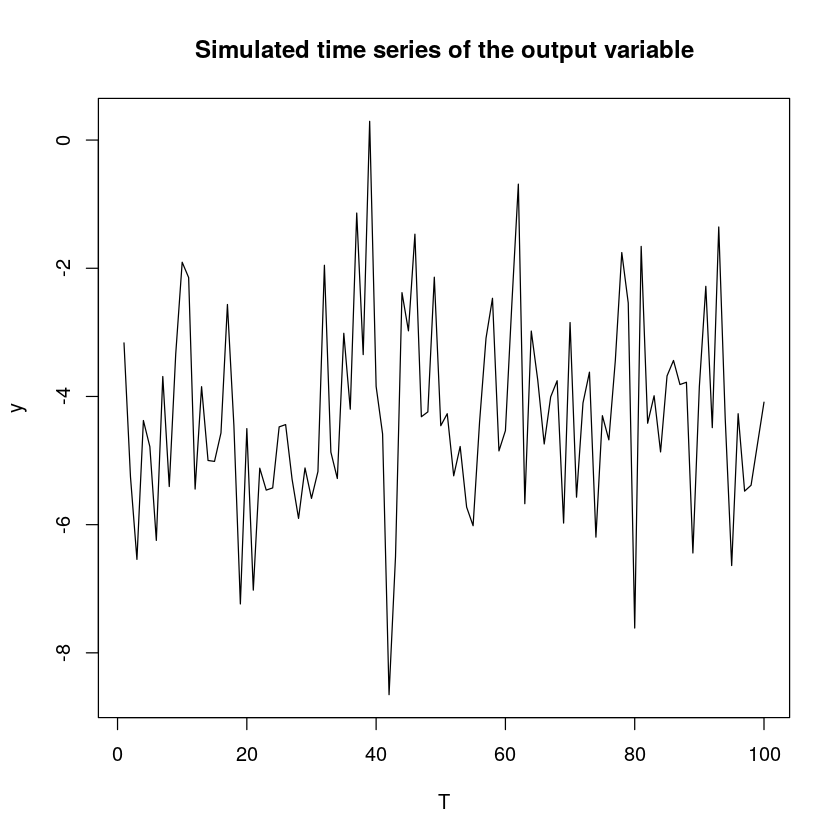

In [75]:
T = seq(1, 100, length.out = 100)
plot(T,model$y,type="l",ylab = 'y', main = 'Simulated time series of the output variable')

I check the simulated series on stationary with the Augmented Dickey–Fuller (ADF) test:

In [76]:
adf.test(model$y)

Warning message in adf.test(model$y):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  model$y
Dickey-Fuller = -4.7436, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


We can see that the series are indeed stationary. The same results holds for input variables. 

Then I run the estimation function for the tuning parameter grid:

In [45]:
lambda.grid <- seq(0.001, 0.3, length.out = 100)
result <- find.MSE(model$x, model$y, model$coef, lambda.grid=lambda.grid)

Here are the MSEs of ridge and lasso regressions for the each value of tuning parameter on grid:

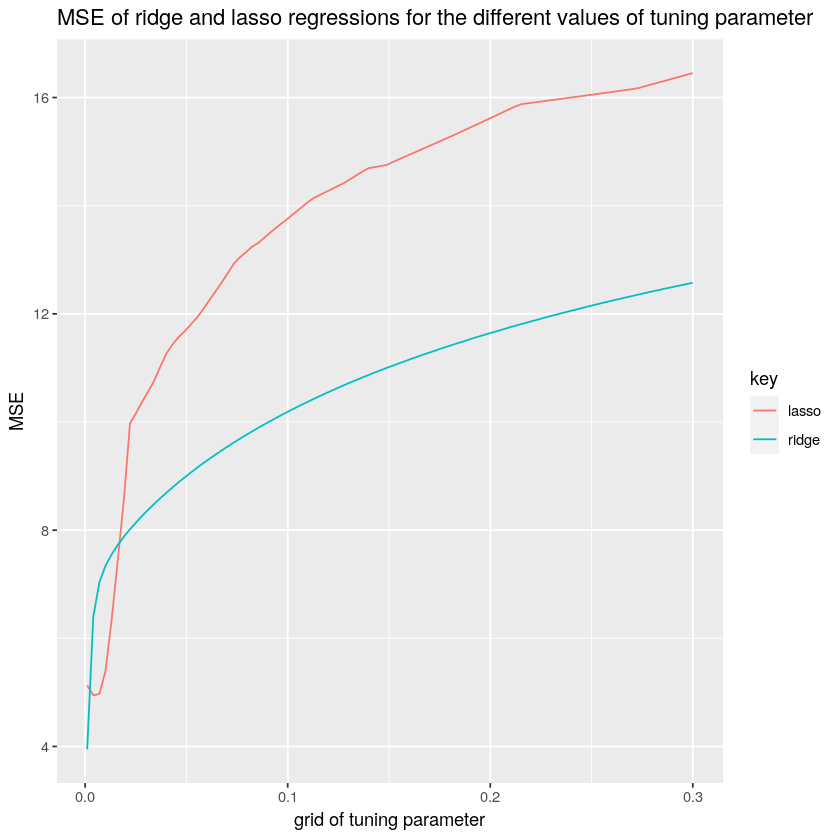

In [74]:
df = data.frame(lambda.grid, ridge=result$MSE.lambda.ridge, lasso=result$MSE.lambda.lasso)
dfplot <- df %>% gather(key, value, -lambda.grid)
plot <- ggplot(dfplot, mapping = aes(x = lambda.grid, y = value, color = key) ) + geom_line()
plot + ggtitle("MSE of ridge and lasso regressions for the different values of tuning parameter") + 
xlab("grid of tuning parameter") + ylab("MSE")

In [77]:
cat("Optimal tuning parameter for ridge regression is",
    round(lambda.grid[which.min(result$MSE.lambda.ridge)],3),"\n")
cat("Optimal tuning parameter for lasso regression is",
    round(lambda.grid[which.min(result$MSE.lambda.lasso)],3),"\n")

Optimal tuning parameter for ridge regression is 0.001 
Optimal tuning parameter for lasso regression is 0.004 


The MSEs of the forecasts with the optimal values of tuning parameter for each method relative to the OLS oracle:

In [78]:
cat("The MSE of ols regression is",round(result$MSE.ols.error/result$MSE.ols.oracle.error, 3),"\n")
cat("The MSE of ridge regression is",round(result$MSE.ridge.error/result$MSE.ols.oracle.error, 3),"\n")
cat("The MSE of lasso regression is",round(result$MSE.lasso.error/result$MSE.ols.oracle.error, 3),"\n")

The MSE of ols regression is NaN 
The MSE of ridge regression is 1.51 
The MSE of lasso regression is 1.32 


We see that the value for the OLS regression is, obviously, unavailable because the number of regressors is equal to the number of observations in this specification. We also see that in this particular trial lasso outperforms ridge. That makes sense since the model is sparse.

OLS and ridge include all ten variales to the model:

In [79]:
cat("The number of variables selected by ols regression",result$var.ols,"\n")
cat("The number of variables selected by ridge regression",result$var.ridge,"\n")
cat("The number of variables selected by lasso regression",result$var.lasso,"\n")

The number of variables selected by ols regression NaN 
The number of variables selected by ridge regression 100 
The number of variables selected by lasso regression 85 


The lasso performs the variable selection: it chooses 85 predictors. However, the true number of predictors is 5 so then more advanced technics such as adaptive lasso are necessary to improve the selection process.

**3.3 Sparsity and number of predictors effects** <a class="anchor" id="section_3_3"></a>

To demonstrate how sparsity and number of predictors define the performance of ols, ridge and lasso regressions I generate and estimate the sparse and abundant models without cross-sectional and serial correlation for 10, 50 and 100 predictors 1000 times: 

In [3]:
set.seed(1)
spar.10 <- simulate(Gamma=1000, rho=0, alpha=0, obs=100, vars=10, spar=T, lambda.grid=lambda.grid)
spar.50 <- simulate(Gamma=1000, rho=0, alpha=0, obs=100, vars=50, spar=T, lambda.grid=lambda.grid)
spar.100 <- simulate(Gamma=1000, rho=0, alpha=0, obs=100, vars=100, spar=T, lambda.grid=lambda.grid)
abun.10 <- simulate(Gamma=1000, rho=0, alpha=0, obs=100, vars=10, spar=F, lambda.grid=lambda.grid)
abun.50 <- simulate(Gamma=1000, rho=0, alpha=0, obs=100, vars=50, spar=F, lambda.grid=lambda.grid)
abun.100 <- simulate(Gamma=1000, rho=0, alpha=0, obs=100, vars=100, spar=F, lambda.grid=lambda.grid)

To obtain the table, I write the results to latex:

In [1545]:
#correct
> simulation.sparsity <- matrix(c(spar.10$MSE.ols/spar.10$MSE.ols.oracle,spar.10$var.ols,
                                  spar.50$MSE.ols/spar.50$MSE.ols.oracle,spar.50$var.ols,
                                  spar.100$MSE.ols,spar.100$var.ols,
                                  spar.10$MSE.ridge/spar.10$MSE.ols.oracle,spar.10$var.ridge,
                                  spar.50$MSE.ridge/spar.50$MSE.ols.oracle,spar.50$var.ridge, 
                                  spar.100$MSE.ridge/spar.100$MSE.ols.oracle,spar.100$var.ridge,
                                  spar.10$MSE.lasso/spar.10$MSE.ols.oracle,spar.10$var.lasso,
                                  spar.50$MSE.lasso/spar.50$MSE.ols.oracle,spar.50$var.lasso,
                                  spar.100$MSE.lasso/spar.100$MSE.ols.oracle,spar.100$var.lasso,
                                  abun.10$MSE.ols/spar.10$MSE.ols.oracle,abun.10$var.ols,
                                  abun.50$MSE.ols/spar.50$MSE.ols.oracle,abun.50$var.ols,
                                  abun.100$MSE.ols,abun.100$var.ols,
                                  abun.10$MSE.ridge/spar.10$MSE.ols.oracle,abun.10$var.ridge,
                                  abun.50$MSE.ridge/spar.50$MSE.ols.oracle,abun.50$var.ridge,
                                  abun.100$MSE.ridge/spar.100$MSE.ols.oracle,abun.100$var.ridge,
                                  abun.10$MSE.lasso/spar.10$MSE.ols.oracle,abun.10$var.lasso,
                                  abun.50$MSE.lasso/spar.50$MSE.ols.oracle,abun.50$var.lasso,
                                  abun.100$MSE.lasso/spar.100$MSE.ols.oracle,abun.100$var.lasso), 
                                  nrow = 6, dimnames = list(c("MSE10","var10","MSE50","var50","MSE100","var100"),
                                  c("sparols","sparridge","sparlasso","abunols","abunridge",'abunlasso')))
print(xtable(simulation.sparsity, digits=c(0,3,3,3,3,3,3), type = "latex"), 
      file = "tex.files/simulation.sparsity.tex")

![Alt](images/simulation.sparsity.corrected.png)

We can see that for the specification with 10 predictors OLS, ridge and lasso almost don't differ in their performance in both sparse and abundant models. That confirms the conclusion that when the data is low-dimensional and, therefore, potential multicolinearity in the data is absent, then ridge and lasso, in general, do not show significantly better performance than OLS. Smeekes and Wijler (2018) additionally demonstrated that adaptive lasso and adaptive elastic net perform better than OLS in this setting. 

When we sequentially increase the number of predictors, the MSE increases too for both sparse and abundant models. This is so-called "curse of dimensinality": variance grows proportionally to the number of variables included in the model. However, the MSE increases significantly more for the abundant model. It is explained by the fact potential multicolinearity between the larger part of regressors that is associated with the response and the smaller part of the regressors which is not associated with the response complicates the identification of the effect of each predictor. Overall, the forecast for the abundant model would be less precise.

Importantly, both specification with 50 and 100 predictors illustrate that, indeed, lasso outperforms ridge when the model is sparse and ridge outperforms lasso when the model is abundant. That happens because the lasso shrinks some of the coefficients exactly to zero and in the sparse model the large part of true coefficients are equal to zero. On the other hand, ridge shrinks the coefficients toward zero but never sets exactly to zero; and the large part of true coefficients in the abundant model is not zero.  

We also see that lasso performs the variable selection. Not surprisingly, it selects less variables in the sparse model. However, this selection is far from being perfect: in sparse model the number of true predictors is 5 for every specification and in the abundant model I make it 6, 30 and 60 respectively. However, Smeekes and Wijler (2018) found a solution: they report that adaptive lasso and adaptive elastic net perform better variable selection. They also show that the selection is even more precise when BIC is used instead of CV procedure.

**3.4 Cross-sectional and serial correlation effects** <a class="anchor" id="section_3_4"></a>

To analyze the cross-sectional and serial correlation effects I choose the specification with 50 potential predictors and simulate the trials for both sparse and abundant models varying th values for $p$ and $\alpha$:

In [1519]:
spar.50.cross <- simulate(Gamma=1000, rho=0.6, alpha=0, obs=100, vars=50, spar=T, lambda.grid=lambda.grid)
abun.50.cross <- simulate(Gamma=1000, rho=0.6, alpha=0, obs=100, vars=50, spar=F, lambda.grid=lambda.grid)
spar.50.serial <- simulate(Gamma=1000, rho=0.6, alpha=0.6, obs=100, vars=50, spar=T, lambda.grid=lambda.grid)
abun.50.serial <- simulate(Gamma=1000, rho=0.6, alpha=0.6, obs=100, vars=50, spar=F, lambda.grid=lambda.grid)

In [1551]:
simulation.correlation <- matrix(c(spar.50$MSE.ols/spar.50$MSE.ols.oracle,spar.50$var.ols, 
                        spar.50.cross$MSE.ols/spar.50.cross$MSE.ols.oracle,spar.50.cross$var.ols,
                        spar.50.serial$MSE.ols/spar.50.serial$MSE.ols.oracle,spar.50.serial$var.ols,
                        spar.50$MSE.ridge/spar.50$MSE.ols.oracle,spar.50$var.ridge,
                        spar.50.cross$MSE.ridge/spar.50.cross$MSE.ols.oracle,spar.50.cross$var.ridge,
                        spar.50.serial$MSE.ridge/spar.50.serial$MSE.ols.oracle,spar.50.serial$var.ridge,
                        spar.50$MSE.lasso/spar.50$MSE.ols.oracle,spar.50$var.lasso, 
                        spar.50.cross$MSE.lasso/spar.50.cross$MSE.ols.oracle,spar.50.cross$var.lasso,
                        spar.50.serial$MSE.lasso/spar.50.serial$MSE.ols.oracle,spar.50.serial$var.lasso,
                        abun.50$MSE.ols/spar.50$MSE.ols.oracle,abun.50$var.ols, 
                        abun.50.cross$MSE.ols/spar.50.cross$MSE.ols.oracle, abun.50.cross$var.ols,
                        abun.50.serial$MSE.ols/spar.50.serial$MSE.ols.oracle,abun.50.serial$var.ols,
                        abun.50$MSE.ridge/spar.50$MSE.ols.oracle,abun.50$var.ridge,
                        abun.50.cross$MSE.ridge/spar.50.cross$MSE.ols.oracle,abun.50.cross$var.ridge,
                        abun.50.serial$MSE.ridge/spar.50.serial$MSE.ols.oracle,abun.50.serial$var.ridge,
                        abun.50$MSE.lasso/spar.50$MSE.ols.oracle,abun.50$var.lasso, 
                        abun.50.cross$MSE.lasso/spar.50.cross$MSE.ols.oracle,abun.50.cross$var.lasso,
                        abun.50.serial$MSE.lasso/spar.50.serial$MSE.ols.oracle,abun.50.serial$var.lasso), 
       nrow = 6, dimnames = list(c("MSEno","varno","MSEcross","varcross","MSEserial","varserial"), 
                                 c("sparols","sparridge","sparlasso","abunols","abunridge",'abunlasso')))
print(xtable(simulation.correlation, digits=c(0,3,3,3,3,3,3), type = "latex"), file = "simulation.correlation.tex")

![Alt](images/simulation.correlation.corr.png)

Cross-sectional correlation does not significantly changes the picture for the sparse model: lasso is still sligthly ourperforms ridge; even though the MSE decreases more for ridge regression than for lasso. On the other hand, the MSE grows quite a lot in the abundant model underlining the fact that multicolinearity in the data is particularly dangerous when there are many true predictors of the response. Since the majority of relevant variables and few irrelevant variables might be correlated, it is more challenging to recognize the effect of each variable. Ridge is still a favorable method in this case. 

We observe that the introduction of serial correlation has little effect on the relative forecasting or selection performance of ridge and lasso: the trends described above also take place here. However, the variance of sparse and abundant models with autocorrelated errors tends to be lower which is a well-known fact in econometrics. If we ignore the serial correlation and estimate the variance the usual way, the variance estimator underestimates the true variance and the bias can be substantial. That justifies adding a lag/lags of a reponse variable to the model in the empirical application part.

## 4. Empirical application <a class="anchor" id="chapter4"></a>

To demonstrate the performance of ridge and lasso in macroeconomic forecasting I use [FRED Monthly Database for Macroeconomic Research](https://research.stlouisfed.org/econ/mccracken/fred-databases/) as the authors of the original paper Smeekes and Wijler (2018) do. Clearly, there exist a large number of publicly available macroeconomic databases (a comprehensive list of macroeconomic databases can be found on the [webpage](https://www.eui.eu/Research/Library/ResearchGuides/Economics/Statistics/MacroDataSet) of The European University Institute). A researcher can choose the one for her needs and apply the corresponding forecasting methods. FRED database presents 135 variables on a monthly basis beginning from 1959. The variables are organized in eight groups:  Output and income; Labor market; Housing; Consumption, orders, and inventories; Money and credit; Interest and exchange rates; Prices; Stock market. 

**4.1 Data preparation** <a class="anchor" id="section_4_1"></a>

One of the advantages of using the FRED dataset is that it contains the information on the necessary transformation of the series to correct for stationarity. The tcode row for each series in the dataset denotes the following transformation of $x$: (1) not transformation; (2) $\Delta x_t$; (3) $\Delta^2 x_t$; (4) $log(x_t)$; (5) $\Delta log(x_t)$; (6) $\Delta^2 log(x_t)$; (7) $\Delta (x_t/x_{t-1} - 1)$. To prepare the data for the estimation I remove the missing values and apply the transformation to the series:

In [15]:
#load the data and remove missing values
data <- read.csv("data.csv")
dates <- as.matrix(data[3:(nrow(data)-1),1]) #2 less for later differencing
data.raw <- data[1:(nrow(data)-1),-1]
missing <- apply(data.raw,2,function(x){sum(is.na(x))})
data.raw <- data.clean <- as.matrix(data.raw[,!missing>2])
data.raw <- data.clean <- na.omit(data.raw)
tcode <- data[1,-1][!missing>2]
names<- colnames(data.raw)
n <- nrow(data.clean)
p <- ncol(data.clean)

#correct for stationarity
n2 <- nrow(data.clean)-2
transformed <- vector()
for(i in 1:length(tcode)){
    if( tcode[i]==1){
        tmp <- data.clean[,i]
    }else if(tcode[i]==2){
        tmp <- diff(data.clean[,i])
    }else if(tcode[i]==3){
        tmp <- diff(data.clean[,i],differences=2)
    }else if(tcode[i]==4){
        tmp <- log(data.clean[,i])
    }else if(tcode[i]==5){
        tmp <- diff(log(data.clean[,i]))
    }else if(tcode[i]==6){
        tmp <- diff(log(data.clean[,i]),differences=2)
    }else if(tcode[i]==7){
        tmp <- data.clean[,i]/c(0,data.clean[-nrow(data),i]) - 1
    }
    transformed <- cbind(transformed,tail(tmp,n2))
}
cleaned <- data.clean
colnames(transformed) <- colnames(cleaned)

Warning message in data.clean[, i]/c(0, data.clean[-nrow(data), i]):
“longer object length is not a multiple of shorter object length”


**4.2 Application** <a class="anchor" id="section_4_2"></a>

I choose three series from different groups as response variables to showcase the forecasting performance of ridge and lasso: 
- Total Industrial Production from the group Output and income
- Civilian Employment from the group Labor market
- Real Personal Consumption Expenditures from the group Consumption, orders, and inventories
- Effective Federal Funds Rate from the group Interest and exchange rates

These series are similar to those frequently used in the forecasting literature (e.g. Kristensen (2017), Ludvigson and Ng (2009), Stock and Watson (2002b)).

In [16]:
var.names <- c("INDPRO", "CE16OV", "DPCERA3M086SBEA", "FEDFUNDS")
names <- c("Total Industrial Production", 
           "Civilian Employment",
           "Real personal consumption expenditures",
          "Effective Federal Funds Rate")

I consider the following forecasting equation:

$$y_{t+h} = \alpha + x'_t \beta_x + \sum_{i=1}^p \beta_i y_{t-i+1} + \epsilon_{t+h}$$

where $h$ is the forecasting horizon (I produce the forecast for the 6 months ahead); $x_t$ is the vector of all potential predictors; and $\sum_{i=1}^p y_{t-i+1}$ are the lags of the response with the maximum length of 6.

In [17]:
h <- 6 #Forecast horizon
p.max <- 6 #Maximum number of AR lags

In the estimation I follow rolling window approach as in Smeekes and Wijler (2018). It means that an initial in-sample period covering 10 years of monthly observations ($window=120$) is used to estimate the models by which to obtain the first out-of-sample prediction. For each new prediction, we keep the length of the in-sample period fixed and move the estimation sample forward by one period. The number of optimal lags is determined by BIC. The optimal $\lambda$ is determined by the CV and the test MSE. The parallel processing by clusters is used to shorten the time of running the code.

I show the initial part of the code for the matter of demonstration and run the loop further in the section. The below algorithm is perfomed for each response variable of interest. The first step is to transform the whole dataset for a response variable such that it can have the matrix of independant variables for $[0:T]$ periods; the six lags of dependant variable for each of $[0:T]$ periods; and the vector of dependant variable for the periods $[h:T+h]$. Then we start the parallel forecast by applying the function **forecast** $f = T-window-h+1$ times:

#Create clusters and fix RNG seed

    cl <- makeCluster(detectCores()-1)
    clusterSetRNGStream(cl,iseed=2345678)
    iter <- 0
                    
#Loop forecasts over different dependent variables

     for(b in 1:length(var.names)){
        iter <- iter+1
    
        #Obtain variables used for estimation
        name <- y.name <- var.names[b]
        y.ind <- which(colnames(cleaned)==name)
        code <- tcode[y.ind]
        y.tr <- transformed[,y.ind]
        y.lags <- embed(y.tr,6)
        x <- tail(transformed[,-y.ind],nrow(y.lags))
        y.raw <- cleaned[,y.ind]
        y.h <- y.tr[(p.max+h):length(y.tr)]
        x <- head(x,length(y.h))

        #start parallel forecast
        varlist <- ls()
        clusterSetRNGStream(cl,iseed=123457)
        clusterExport(cl=cl,c(varlist,"mvrnorm","glmnet","cv.glmnet"))
        f <- length(y.h)-window-h+1
        output <- pblapply(1:f,forecast,cl=cl)

For each $i$ from $f$ the function **forecast** determines training set as $[i:(i-1+window)]$ observations of the main dataset and test set as an observation in $h$ periods $(i-1+window+h)$. Then it estimates the coefficients on the training set by ridge and lasso; finds the number of optimal lags and the number of selected variables by lasso using the function **GLMN.emp**. As the final step, it derives the MSE using test observation:

In [18]:
forecast <- function(i){

      #Define data sample
      t <- window+h
      x.train <- x[i:(i-1+window),]
      y.l <- y.lags[i:(i-1+window),]
      y.train <- y.h[i:(i-1+window)]
      x.test <- x[i-1+t,]
      y.test <- y.lags[i-1+t,]
      y.f <- y.h[i-1+t]
      n <- length(y.train)

      #Define object to store results
      pred <- vector()
      MSE <- vector()
      nvar <- vector()
      lags <- vector()
      coefs <- list()
      names <- NULL
      count <- 0

      #shrinkage estimators
      algos <- c("ridge","las")
      ICs <- c("CV")
      for(j in 1:length(algos)){
        for(i in 1:length(ICs)){
          count <- count+1

          #Define algorithm name and IC
          name <- paste(algos[j],ICs[i],sep="")
          names <- c(names,name)

          #Perform estimation
          tmp <- GLMN.emp(y.train,x.train,y.l,type=algos[j],IC=ICs[i],IC.lag="BIC")  
          p <- tmp$lags
          coef <- tmp$beta
          yhat <- t(c(1,x.test,y.test[0:p]))%*%coef
          pred[count] <- yhat
          MSE[count] <- (y.f-yhat)^2
          nvar[count] <- sum(as.logical(coef[-1]))
          coefs[[count]] <- coef
          lags[count] <- p
          
        }
      }

      #obtain output
      results <- rbind(pred,MSE,nvar,lags)
      colnames(results) <- names
      list(results=results,coefs=coefs,actual=y.f)

}

The purpose of the function **GLMN.emp** is to create a loop for each possible number of lags of the response variable, estimate the coefficients by the function **GLMN** and obtain the value of BIC by the function **get.IC** for each lag. Then it chooses the optimal number of lags by the lowest BIC and saves the respective vector of coefficients:

In [19]:
GLMN.emp <- function(y,x,y.lags,type,IC,IC.lag){
    ps <- 0:ncol(y.lags)
    ICS <- vector()
    betas <- list()
    for(i in 1:length(ps)){
        p <- ps[i]
        x.tmp <- cbind(x,y.lags[,0:p])
        beta <- GLMN(y,x.tmp,type=type,IC=IC,p=p)
        betas[[i]] <- beta
        ICS[i] <- get.IC(y,x.tmp,beta,IC=IC.lag,addint=T)
    }
    beta <- matrix(betas[[which.min(ICS)]],ncol=1)
    lags <- ps[which.min(ICS)]
    list(beta=beta,lags=lags)
}

The function **GLMN** divides our training set to the training and test observations again with the threshold $c_T$ introduced in the simulation part. It estimates the coefficients on the training observations either by ridge or lasso for the grid of $\lambda$ values; applies the coefficients to the test observations; finds the predicted values of the response variable; and chooses the optimal $\lambda$ by the minimal test MSE. Then it saves the vector of coefficients corresponding to the optimal $\lambda$ for each method:

In [20]:
GLMN <- function(y,x,type="ridge",IC="BIC",p=0){
    #normalize data
    ys <- scale(y)
    xs <- scale(x)
    
    if(type=="las"){
      w <- rep(1,ncol(x))
      if(p>0){
        w[(length(w)-p+1):length(w)] <- 0
      }
        m <- ceiling((2/3)*nrow(x))
        x.tr <- xs[1:m,]
        y.tr <- ys[1:m]
        x.te <- xs[(m+1):nrow(x),]
        y.te <- ys[(m+1):nrow(x)]
        glm <- glmnet(scale(x.tr),scale(y.tr),family="gaussian",alpha=1-1e-6,penalty.factor = w)
        coefs <- as.matrix(coef(glm))
        lambdas <- as.numeric(glm$lambda)
        y.pr <- cbind(rep(1,nrow(x.te)),x.te)%*%coefs
        y.te <- matrix(rep(y.te,ncol(coefs)),length(y.te),ncol(coefs))
        SFE <- (y.te-y.pr)^2
        MSE <- colMeans(SFE)
        lambda <- lambdas[which.min(MSE)]
        beta <- coef(glmnet(xs,ys,family="gaussian",alpha=1-1e-6,penalty.factor = w,lambda = lambda))
        
    }else if(type=="ridge"){
      w <- rep(1,ncol(x))
      if(p>0){
        w[(length(w)-p+1):length(w)] <- 0
      }
        m <- ceiling((2/3)*nrow(x))
        x.tr <- xs[1:m,]
        y.tr <- ys[1:m]
        x.te <- xs[(m+1):nrow(x),]
        y.te <- ys[(m+1):nrow(x)]
        glm <- glmnet(scale(x.tr),scale(y.tr),family="gaussian",alpha=0,penalty.factor = w)
        coefs <- as.matrix(coef(glm))
        lambdas <- as.numeric(glm$lambda)
        y.pr <- cbind(rep(1,nrow(x.te)),x.te)%*%coefs
        y.te <- matrix(rep(y.te,ncol(coefs)),length(y.te),ncol(coefs))
        SFE <- (y.te-y.pr)^2
        MSE <- colMeans(SFE)
        lambda <- lambdas[which.min(MSE)]
        beta <- coef(glmnet(xs,ys,family="gaussian",alpha=0,penalty.factor = w,lambda = lambda))
    }
    beta
}

The function **get.IC** calculates the value of BIC either with or without intercept:

In [21]:
get.IC <- function(y,x,beta,IC="BIC",addint=T){
   
     #Calculate variance
    if(addint==T){
        var <- sum((y-cbind(rep(1,nrow(x)),x)%*% beta)^2)/length(y)
    }else{
        var <- sum((y-x%*% beta)^2)/length(y)
    }
    
    #Get IC
    value <- log(var) + sum(beta!=0)*log(length(y))/length(y)
    value
}

Finally, after the description of each function we can run the main loop of the empirical part. The function **forecast** saved the MSE, the selected number of variables and the optimal number of lags for every $i$. Now these values are averaged accross all $f$:

In [22]:
#Create clusters and fix RNG seed
cl <- makeCluster(detectCores()-1)
clusterSetRNGStream(cl,iseed=2345678)
iter <- 0
                    
#Loop forecasts over different dependent variables
for(b in 1:length(var.names)){
    iter <- iter+1
    
    #Obtain variables used for estimation
    name <- y.name <- var.names[b]
    y.ind <- which(colnames(cleaned)==name)
    code <- tcode[y.ind]
    y.tr <- transformed[,y.ind]
    y.lags <- embed(y.tr,6)
    x <- tail(transformed[,-y.ind],nrow(y.lags))
    y.raw <- cleaned[,y.ind]
    y.h <- y.tr[(p.max+h):length(y.tr)]
    x <- head(x,length(y.h))
    
    #start parallel forecast
    varlist <- ls()
    clusterSetRNGStream(cl,iseed=123457)
    clusterExport(cl=cl,c(varlist,"mvrnorm","glmnet","cv.glmnet"))
    f <- length(y.h)-window-h+1
    output <- pblapply(1:f,forecast,cl=cl)
    results <- lapply(output,function(x){x[[1]]})
    
    #collect output
    predictions <- t(sapply(results,function(x){x[1,]}))
    sfes <- t(sapply(results,function(x){x[2,]}))
    nvars <- t(sapply(results,function(x){x[3,]}))
    lags <- t(sapply(results,function(x){x[4,]}))
    actuals <- sapply(output,function(x){x$actual})
    coefficients <- lapply(output,function(x){x$coefs})
    result <- Reduce("+",results)[-1,]/f
    MSE <- result[1,]/result[1,1]
    result <- rbind(MSE,result)
    print(names[b])
    print(result[c(1,3:4),])
}
                    
stopCluster(cl)

[1] "Total Industrial Production"
       ridgeCV     lasCV
MSE    1.00000 0.5305135
nvar 123.64564 3.2504638
lags   2.64564 1.7050093
[1] "Civilian Employment"
        ridgeCV    lasCV
MSE    1.000000 1.736772
nvar 124.046382 6.146568
lags   3.046382 1.920223
[1] "Real personal consumption expenditures"
       ridgeCV     lasCV
MSE    1.00000 0.8866497
nvar 124.16141 5.0129870
lags   3.16141 2.8998145
[1] "Effective Federal Funds Rate"
        ridgeCV    lasCV
MSE    1.000000 1.011715
nvar 122.779221 5.009276
lags   1.779221 1.762523


As the result, we obtain the MSE, the selected number of variables and the optimal number of lags by ridge and lasso for each variable. The lasso MSE is given relative to the ridge MSE. Unfortunately, I cannot compare the estimation results with OLS because the number of observations for each window is less than the number of potential predictors.

We look at three different cases here: when ridge outperforms lasso; when lasso outperforms ridge; and when the MSE for two methods are relatively equal. It confirms the fact that the methods from shrinkage group might have different forecasting performance even within one dataset. Which method outperforms depends on the DGP of the response variables. Following the results in my simulation part, the sparsity and multi-colinearity in the data are among the factors that determine the precision of each method. Therefore, the recommendation for the researchers using shrinkage methods to forecast the macroeconomic environment would be not to focus on one of the them; but to compare the performance of few in different settings. The combination of methods will help to avoid unnecessary bias in the forecast and to obtain more precise results.

## 5. Conclusion <a class="anchor" id="chapter5"></a>

I performed an analysis of performance of shrinkage methods, in particular, of ridge and lasso regressions on macroecnomic forecasting. First, I explained why shrinkage methods is an appropriate tool for predicting macroeconomic outcomes: they reduce the variance in high-dimensional data setting by regularizing the coefficients estimates on the cost of estimates bias. Because of the differences in regularizing norms, which ridge and lasso employ, they also have different theoretical properties. Specifically, lasso shrinks some of the coefficients exactly to zero and ridge shrinks the coeficients toward zero but never sets them exactly to zero. This fact justifies that ridge and lasso outperform each other in settings with different DGP. 

I show in the realistic simulated macroeconomic setting that lasso outperforms ridge when only few of all predictors included to the model are associated with a response. On the other hand, ridge is more favorable when there is a large number of true predictors effecting the response. It is relevant for the increasing number of variables included to the model. I also demostrate that the forecast by ridge and lasso is less precise in case of the abundant model because of possible multicolinearity between relevant and irrelevant variables. Additionally, I confirm this fact by manually introducing multicolinearity to the data. Finally, I illustrate that including serirally correlated errors to the model does not effect the comparative perofrmance of ridge ad lasso, but, overall, it underestimates the variance in all specifications. 

In section 4 I apply ridge and lasso regressions in the empirical setting where we do not know the true DGP. I take a popular among macroeconomists dataset and implement few statistical technics to derive the ridge and lasso coefficients in the model with AR lags and to calculate the MSE of the forecast. I find that ridge and lasso outperform each other for different macroeconomic variables. Therefore, I conclude that an optimal strategy for macroeconomists would be not to choose one shrinkage method to perform the forecast; but to combine few methods and compare their performance. The area for the future research would be to add the other shrinkage methods and assess their performance in various time series settings such as non-stationary series, cointagrated variables, and VAR models.

## 6. References <a class="anchor" id="chapter6"></a>

- Bai, J. (2003). [Inferential theory for factor models of large dimensions](https://onlinelibrary.wiley.com/doi/abs/10.1111/1468-0262.00392). *Econometrica, 71*(1), 135-171.
- Bai, J. and Ng, S. (2006). [Confidence intervals for diffusion index forecasts and inference for factor‐augmented regressions](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1468-0262.2006.00696.x).  *Econometrica, 74*(4), 1133-1150.
- Bai, J. and Ng, S. (2001). [Determining the number of factors in approximate factor models](https://onlinelibrary.wiley.com/doi/abs/10.1111/1468-0262.00273). *Econometrica, 70*(1),  191-221.
- Basu, S., and Michailidis, G. (2015). [Regularized estimation in sparse high-dimensional time series models](https://www.jstor.org/stable/43556652?seq=1). *The Annals of Statistics, 43*(4), 1535-1567. 
- Beard, E., Brown, J., West, R., Kaner, E., Meier, P., Michie, S. (2019). [Associations between socio-economic factors and alcohol consumption: a population survey of adults in England](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0209442). *PLoS One, 14*(2).
- Bucca, M., and Urbina, D. R. (2019). [Lasso regularization for selection of log-linear models: an application to educational assortative mating](https://journals.sagepub.com/doi/10.1177/0049124119826154#articleCitationDownloadContainer).* Sociological Methods & Research*.
- Bühlmann, P., and van de Geer, S. (2011). [Theory for the lasso](https://link.springer.com/chapter/10.1007/978-3-642-20192-9_6#citeas). In: *Statistics for High-Dimensional Data. Springer Series in Statistics*. Springer, Berlin, Heidelberg.
- Carriero, A., Galvao, A., and Kapetanios, G. (2016). [A comprehensive evaluation of macroeconomic forecasting methods](https://www.sciencedirect.com/science/article/abs/pii/S0169207019300731). *International Journal of Forecasting, 35*(4), 1226-1239.
- Conniffe, D., Stone, J., and O'Neill, F. (1976). [Application of ridge regression in agricultural economics](https://www.jstor.org/stable/pdf/25556415.pdf?seq=1). *Irish Journal of Agricultural Economics and Rural Sociology, 6*(1), 89-92.
- Coulombe, P., Stevanovic, D., and Surprenant, S. (2019). [How is machine learning useful for macroeconomic forecasting?](https://economics.sas.upenn.edu/system/files/2019-03/GCLSS_MC_MacroFcst.pdf) *CIRANO Working Papers* 2019s-22, CIRANO.
- Ginestet, C.E. [Regularization: ridge regression and lasso](http://math.bu.edu/people/cgineste/classes/ma575/p/w14_1.pdf).  Lecture 2.
- Goebl, C. S., Boykurt, L., Tura, A., Pacini, G., Kautzkz-Willer, A., and Mittlboeck, M. (2015). [Application of penalized regression techniques in modelling insulin sensitivity by correlated metabolic parameters](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0141524). *PLoS ONE*.
- Hall, A. (2018). [Machine learning approaches to macroeconomic forecasting](https://www.kansascityfed.org/~/media/files/publicat/econrev/econrevarchive/2018/4q18smalterhall.pdf). *Economic Review*, Federal Reserve Bank of Kansas City, issue Q IV, 63-81.
- Hastie, T., Tibshirani, R., and Friedman, J. (2001). [The elements of statistical learning](https://web.stanford.edu/~hastie/ElemStatLearn/). *Springer New York Inc.*, New York, NY, USA.
- Hoerl, A. and Kennard, R. (1970). [Ridge regression: biased estimation for nonorthogonal problems](https://www.tandfonline.com/doi/abs/10.1080/00401706.1970.10488634). *Technometrics, 12*, 55-67. 
- Huang, C. and Mintz, A. (1990). [Ridge regression analysis of the defence‐growth tradeoff in the United States](https://www.tandfonline.com/doi/abs/10.1080/10430719008404676). *Defence Economics, 2*, 29-37.
- Hyndman, R.J., and Athanasopoulos, G. (2018) [Forecasting: principles and practice](OTexts.com/fpp2). *OTexts*, Melbourne, Australia.
- Jain, R. (1985). [Ridge regression and its application to medical data](https://pubmed.ncbi.nlm.nih.gov/4042638/). *Computational Biomedical Ressearch, 18*(4), 363-368. 
- Jamal, N. and Rind, M. (2007). [Ridge regression: a tool to forecast wheat area and production](https://www.researchgate.net/publication/44286448_Ridge_Regression_A_tool_to_forecast_wheat_area_and_production). *Pakistan Journal of Statistics and Operation Research, 3*(2). 
- James, G., Witten, D., Hastie, T., and Tibshirani, R. (2014). [An introduction to statistical learning: with applications in R](https://dl.acm.org/doi/book/10.5555/2517747). *Springer New York Inc.*, New York, NY, USA.
- Jean, N., Burke, M., Xie, M., Davis, W., Lobell, D., and Ermon, S. (2016). [Combining satellite imagery and machine learning to predict poverty](https://science.sciencemag.org/content/353/6301/790). *Science, 353*, 790-794. 
- Johnston, L. and Engelhardt, B. (2019). [Predicting crop yield and disease trends in central New Jersey farms](https://www.semanticscholar.org/paper/Predicting-Crop-Yield-and-Disease-Trends-in-Central-Johnston-Adviser/8cd0e88e5d3aa2f23e01ca09d7a0c376e91215c7). Working paper.
- Kim, H. and Swanson, N. (2014). [Forecasting financial and macroeconomic variables using data reduction methods: New empirical evidence](https://www.sciencedirect.com/science/article/pii/S0304407613001978). SSRN Electronic Journal. 10.2139/ssrn.1856082. 
- Kock, A. and Callot, L. (2015). [Oracle inequalities for high dimensional vector autoregressions](https://www.sciencedirect.com/science/article/pii/S0304407615000378). *Journal of Econometrics, 186*(2), 325-344.
- Kristensen, J.T. (2017). [Diffusion indexes with sparse loadings](https://www.tandfonline.com/doi/full/10.1080/07350015.2015.1084308). *Journal of Business & Economic Statistics, 35*, 434-451.
- Ludvigson, S.C., and Ng, S. (2009). [A factor analysis of bond risk premia](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.416.108&rep=rep1&type=pdf). *National Bureau of Economic Research*, w15188.
-  McCracken, M. W. and Ng, S. (2015). [FRED-MD: a monthly database for macroeconomic research](https://research.stlouisfed.org/wp/more/2015-012). *Working Papers 2015-12*, Federal Reserve Bank of St. Louis.
- McKenzie, D. and Sansone, D. (2019). [Predicting entrepreneurial success is hard: Evidence from a business plan competition in Nigeria](https://www.sciencedirect.com/science/article/abs/pii/S0304387818305601?via%3Dihub). *Journal of Development Economics, 141*, 102369.
- Medeiros, M. and Mendes, E. (2015). [L1-regularization of high-dimensional time-series models with non-Gaussian and heteroskedastic errors](https://www.sciencedirect.com/science/article/pii/S0304407615002638). *Journal of Econometrics, 191*(1), 255-271. 
- Mol, C., Giannone, D., and Reichlin, L. (2008). [Forecasting using a large number of predictors: is Bayesian shrinkage a valid alternative to principal components?](https://www.sciencedirect.com/science/article/pii/S0304407608001103). *Journal of Econometrics, 146*, 318-328. 
- Molina, M. and Garip, F. (2019). [Machine learning for sociology](https://www.annualreviews.org/doi/10.1146/annurev-soc-073117-041106). *Annual Review of Sociology, 45*, 27-45.
- Mullainathan, S. and Spiess, J. (2017). [Machine learning: an applied econometric approach](https://www.aeaweb.org/articles?id=10.1257/jep.31.2.87). *Journal of Economic Perspectives, 31*(2), 87-106.
- Ng, S. (2013). [Variable selection in predictive regressions](https://www.sciencedirect.com/science/article/pii/B9780444627315000142). *Handbook of Economic Forecasting*, in: G. Elliott, C. Granger,  A. Timmermann (ed.),Handbook of Economic Forecasting, 1(2), chapter 0, 752-789.
- Ogutu, J., Schulz-Streeck, T., and Piepho, H. (2012). [Genomic selection using regularized linear regression models: ridge regression, lasso, elastic net and their extensions](https://www.semanticscholar.org/paper/Genomic-selection-using-regularized-linear-models%3A-Ogutu-Schulz-Streeck/9b6327dab2d0cb4b21489e0881ad4120a5b5149e). *BMC Proceedings, 6*, S10 - S10.
- Pimentel, E., Queiroz, S., Carvalheiro, R., and Fries, L. (2007). [Use of ridge regression for the prediction of early growth performance in crossbred calves](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1415-47572007000400006). *Genetics and Molecular Biology, 30*(3).
- Reiss, P. C. and Wolak, F.A. (2007). [Structural econometric modeling: rationales and examples from industrial organization](https://web.stanford.edu/group/fwolak/cgi-bin/sites/default/files/files/Structural%20Econometric%20Modeling_Rationales%20and%20Examples%20From%20Industrial%20Organization_Reiss%2C%20Wolak.pdf). *Handbook of Econometrics*, in: J.J. Heckman & E.E. Leamer (ed.),Handbook of Econometrics, 1(6), chapter 64. 
- Saleh, A., Arashi, M., and Kibria, B. (2019). [Theory of ridge regression estimation with applications](https://www.wiley.com/en-us/Theory+of+Ridge+Regression+Estimation+with+Applications-p-9781118644614). *John Wiley & Sons, Inc.*, Hoboken, NJ, USA.
- Schneider, U. and Wagner, M. (2008). [Catching growth determinants with the adaptive LASSO](https://ideas.repec.org/p/ihs/ihsesp/232.html). *Economics Series 232*, Institute for Advanced Studies.
- Singh, K., Singh, K.K., Kumar, S., Panwar, S., and Gurung, B. (2019). [Forecasting crop yield through weather indices through LASSO](https://www.researchgate.net/publication/332810158_Forecasting_crop_yield_through_weather_indices_through_LASSO). *Indian Journal of Agricultural Sciences, 89*, 540-544. 
- Smeekes, S., and Wijler, E. (2018). [Macroeconomic forecasting using penalized regression methods](https://www.sciencedirect.com/science/article/pii/S0169207018300074). International Journal of Forecasting, 34(3), 408-430.
- Stock, J. H., and Watson, M. W. (2014). [Estimating turning points using large data sets](https://www.sciencedirect.com/science/article/abs/pii/S030440761300198X). *Journal of Econometrics, 178*(P2), 368-381.
- Stock, J. H., and Watson, M. W. (2006). [Chapter 10. Forecasting with many predictors](https://www.sciencedirect.com/science/article/pii/S1574070605010104). *Handbook of Economic Forecasting, 1*, 515-554.
- Stock, J. H., and Watson, M. W. (2002). [Forecasting using principal components from a large number of predictors](http://www.jstor.org/stable/3085839). *Journal of the American Statistical Association, 97*(460), 1167-1179. 
- Stock, J. H., and Watson, M. W. (1999). [Forecasting inflation](https://www.sciencedirect.com/science/article/abs/pii/S0304393299000276). *Journal of Monetary Economics, 44*(2), 293-335.
- Theobald, C. (1974). [Generalizations of mean square error applied to ridge regression](https://www.jstor.org/stable/2984775?seq=1). *Journal of the Royal Statistical Society. Series B (Methodological), 36*(1), 103-106.
- Tibshirani, R. (2012). [The Lasso problem and uniqueness](http://www.stat.cmu.edu/~ryantibs/papers/lassounique.pdf). *Electronic Journal of Statistics, 7*.
- Tibshirani, R. (1996). [Regression shrinkage and selection via the lasso](https://www.jstor.org/stable/2346178?seq=1). *Journal of the Royal Statistical Society. Series B (Methodological), 58*(1), 267-288. 
- Tibshirani, R., and Taylor, J. (2011). [The solution path of the generalized lasso](https://projecteuclid.org/euclid.aos/1304514656). *Annals of Statistics, 39*(3), 1335-1371.
- Vlaming, R. and Groenen, P. (2015). [The current and future use of ridge regression for prediction in quantitative genetics](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4529984/).
- Wang, H., and Leng, C. (2007). [Unified LASSO estimation by least squares approximation](https://www.jstor.org/stable/27639944?seq=1). *Journal of the American Statistical Association, 102*(479), 1039-1048.
- Wieringen, W. (2020a). [Lecture notes on lasso regression](http://www.few.vu.nl/~wvanwie/Courses/HighdimensionalDataAnalysis/WNvanWieringen_HDDA_Lecture56_LassoRegression_20182019.pdf). 
- Wieringen, W. (2020b). [Lecture notes on ridge regression](https://arxiv.org/pdf/1509.09169;Lecture).
- Yunwen, R. and Xinsheng, Z. (2013). [Model selection for vector autoregressive processes via adaptive lasso](https://www.tandfonline.com/doi/abs/10.1080/03610926.2011.611317?needAccess=true&journalCode=lsta20). *Communications in Statistics - Theory and Methods, 42*(13), 2423-2436.
- Zhang, J., Cavallari, J. M., Fang, S. C., Weisskopf, M. G., Lin, X., Mittleman, M. A., and Christiani, D. C. (2017). [Application of linear mixed-effects model with Lasso to identify metal components associated with cardiac autonomic responses among welders: a repeated measures study](https://pubmed.ncbi.nlm.nih.gov/28663305/). *Occupational and Environmental Medicine, 74*(11), 810-815.